# 6.1. Obtención de datos financieros

In [3]:
import pandas as pd
import requests

Vamos a conectarnos con un servicio web para obtener datos financieros

1. Regístrate en iexcloud: https://iexcloud.io/

IEX es la web de un agregador en donde podemos encontrar infinidad de datos

Si hacemos un "uso intensivo", hay que pagar. Pero también tiene una serie de llamadas al mes, que son gratuítas. 

Para lo que vamos a hacer en el máster, es más que perfecto

<center>
<img src="./imgs/portada_iex.png"  alt="drawing" width="1000"/>
</center>

A la hora de registrarte, hay una opción que es 9,99 al mes y otra que es gratuita. Elije esta última.

<center>
<img src="./imgs/gratis.png"  alt="drawing" width="400"/>
</center>

Una vez estéis registrados, tenéis que estar en una pantalla como esta

<center>
<img src="./imgs/registrado.png"  alt="drawing" width="1000"/>
</center>

2. Genera y copia un token de acceso.

En el menú lateral, ve a la llave (access & security) 

<center>
<img src="./imgs/acceess.png"  alt="drawing" width="800"/>
</center>

El token es "la contraseña" que os dará acceso a la descarga de datos

En cada petición que hagamos, deberemos incluir el token

Si no tenéis uno ya creado por defecto, cread uno

3. Observa la documentación, mira los datos que están disponibles.

En la interrogación de arriba a la derecha, seleccionad API Docs

<center>
<img src="./imgs/api_doc.png"  alt="drawing" width="900"/>
</center>

Un API es una dirección web. De hecho, primero haremos los ejemplos en el navegador, para después hacerlos desde python.

Vamos a construir una dirección web, y vamos a añadir el token, para hacer una petición, que nos devolverá un json

La dirección a la que tenemos que llamar es la subrayada

<center>
<img src="./imgs/direccion.png"  alt="drawing" width="400"/>
</center>

Por ejemplo, en historical prices podemos obtener los datos históricos de cualquier stock

<center>
<img src="./imgs/historical.png"  alt="drawing" width="900"/>
</center>

En todas las páginas, más abajo, podemos encontrar ejemplos sobre cómo hacer la llamada

Si pinchamos sobre ellos, nos aparecerá una web indicando que el API KEY es necesaria

Si queremos hacer la llamada, directamente sobre la web, debemos añadir nuestro token, poniendo al final de la dirección una interrogación + nuestro token

<center>
<img src="./imgs/direccion_token.png"  alt="drawing" width="900"/>
</center>

Con el token incluido, podemos ver cómo nos ha traído todos los datos

En Firefox se ve como en la imagen, en Chrome se ve menos bonito.

<center>
<img src="./imgs/datos_web.png"  alt="drawing" width="400"/>
</center>

4. Explora y encuenta los endpoints con los que se obtienen las bolsas disponibles.



<center>
<img src="./imgs/reference_Data.png"  alt="drawing" width="200"/>
</center>

En reference data podrás encontrar International Exchanges

<center>
<img src="./imgs/international_exchanges.png"  alt="drawing" width="400"/>
</center>

5. Encuenta los endpoints con los que se obtienen los símbolos de los activos que cotizan en una bolsa

<center>
<img src="./imgs/international_symbols.png"  alt="drawing" width="600"/>
</center>

Dedicad unos minutos a explorar la documentación y ver distintos ejemplos

6. Prueba a obtener los datos de los últimos dos apartados desde el navegador. Hazlo, por ejemplo, para Bolsa de Madrid

Para ello contruye una url de la siguiente manera: 

```https://cloud.iexapis.com/stable/------rellena lo que quieras pedir ----?token=TU_TOKEN```

Ojo. Solo tenemos 50.000 datos gratuitos al mes: una llamada web también consume datos

En la consola de inicio podéis ver cuantos datos lleváis consumidos

<center>
<img src="./imgs/uso.png"  alt="drawing" width="600"/>
</center>

Para las bolsas internacionales necesitamos /ref-data/exchanges

Bolsa de Madrid es XMAD

<center>
<img src="./imgs/bolsas_internacionales.png"  alt="drawing" width="900"/>
</center>

<center>
<img src="./imgs/bolsa_de_madrid.png"  alt="drawing" width="400"/>
</center>

Para los símbolos internacionales necesitamos /ref-data/exchange/{exchange}/symbols

Las llaves no hay que ponerlas. Hay que poner el símbolo del exchange de Madrid: XMAD

<center>
<img src="./imgs/activos_madrid.png"  alt="drawing" width="1000"/>
</center>

7. Ahora pide lo mismo desde python usando la libreria requests de la siguiente forma:

```python
import requests
url = f'https://cloud.iexapis.com/stable/------rellena lo que quieras pedir ----'
r = requests.get(url, params={'token': TU_TOKEN})
exchanges = pd.read_json(r.content)
```

Obtenemos las bolsas internacionales

In [4]:
TOKEN = 'TU_TOKEN'

In [5]:
base_url = 'https://cloud.iexapis.com/stable'
url = f'{base_url}/ref-data/exchanges'
r = requests.get(url, params={'token':TOKEN})
exchanges = pd.read_json(r.content)

In [6]:
exchanges.head()

,exchange,region,description,mic,segment,segmentDescription,suffix,exchangeSuffix
0,A2XX,ZA,A 2 X,A2XX,A2XX,A 2 X,AJ,AJ
1,AIXK,KZ,Astana International Exchange Ltd,AIXK,AIXK,Astana International Exchange Ltd,KX,KX
2,APXL,AU,Sydney Stock Exchange Limited,APXL,APXL,Sydney Stock Exchange Limited,PF,PF
3,ARCX,US,Nyse Arca,ARCX,ARCX,Nyse Arca,,
4,ASEX,GR,Athens Stock Exchange,ASEX,ASEX,Athens Stock Exchange,GA,GA


Obtenemos los activos que cotizan en Bolsa de Madrid

In [7]:
exchange = 'XMAD'
url = f"{base_url}/ref-data/exchange/{exchange}/symbols"
r = requests.get(url, params={'token': TOKEN})
symbols = pd.read_json(r.content)

In [8]:
symbols.shape

(173, 16)

In [9]:
symbols.head()

,symbol,exchange,exchangeSuffix,exchangeName,exchangeSegment,exchangeSegmentName,name,date,type,iexId,region,currency,isEnabled,figi,cik,lei
0,A3M-SN,XMAD,SN,Bolsa De Madrid,XMAD,Bolsa De Madrid,Atresmedia Corporacion De Medios De Comunicaci...,2022-05-28,cs,NaN,ES,EUR,True,BBG000F5P2P2,1450460.0,95980020140005491929
1,ABG-SN,XMAD,SN,Bolsa De Madrid,XMAD,Bolsa De Madrid,Abengoa - Class A,2022-05-28,cs,NaN,ES,EUR,True,BBG000BM26X6,1161785.0,8ZQH7RR6DBQZIX8PEQ84
2,ABG.P-SN,XMAD,SN,Bolsa De Madrid,XMAD,Bolsa De Madrid,Abengoa - Class B,2022-05-28,cs,NaN,ES,EUR,True,BBG003BMYW77,1161785.0,8ZQH7RR6DBQZIX8PEQ84
3,ACS-SN,XMAD,SN,Bolsa De Madrid,XMAD,Bolsa De Madrid,"ACS, Actividades de Construccion Y Servicios, ...",2022-05-28,cs,NaN,ES,EUR,True,BBG000BMW404,1448375.0,95980020140005558665
4,ACX-SN,XMAD,SN,Bolsa De Madrid,XMAD,Bolsa De Madrid,Acerinox - Registered Shares,2022-05-28,cs,NaN,ES,EUR,True,BBG000BB80F7,1438557.0,95980020140005582721


8. Crea una función que retorne el open, high, low, close y volumen diario del último año, dado un ticker.

Consulta la sección y ejemplos de historical prices

Utiliza el ticker de Nvidia para invocar la función: 'nvda'

In [36]:
def get_data_iex(symbol, st_range='1y'):
    
    url = f"{base_url}/stock/{symbol}/chart/{st_range}"
    r = requests.get(url, params={'token': TOKEN})
    data = pd.read_json(r.content)
    
    data = data.set_index('date')
    data.name = symbol
    
    return data

In [37]:
data_day = get_data_iex('nvda')
data_day.head()

,close,high,low,open,symbol,volume,id,key,subkey,updated,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
date,,,,,,,,,,,,,,,,,,,,,
2021-05-27,154.8800,157.5000,154.6000,156.9975,NVDA,58147520,HISTORICAL_PRICES,NVDA,,1.652532e+12,...,618.40,14536880,156.8879,154.7719,157.3901,154.4921,58147520,"May 27, 21",0.0000,0.0000
2021-05-28,162.4450,162.7748,155.0100,155.0100,NVDA,64453560,HISTORICAL_PRICES,NVDA,,1.652532e+12,...,620.04,16113390,154.9018,162.3316,162.6611,154.9018,64453560,"May 28, 21",7.5650,0.0488
2021-06-01,162.6450,163.8813,159.0325,162.7000,NVDA,47280300,HISTORICAL_PRICES,NVDA,,1.652532e+12,...,636.13,11820075,162.5864,162.5315,163.7669,158.9215,47280300,"Jun 1, 21",0.2000,0.0012
2021-06-02,167.7825,169.1887,162.3550,162.5225,NVDA,59416756,HISTORICAL_PRICES,NVDA,,1.652532e+12,...,649.42,14854189,162.4091,167.6654,169.0706,162.2417,59416756,"Jun 2, 21",5.1375,0.0316
2021-06-03,169.6975,172.5900,165.8300,167.0075,NVDA,58000680,HISTORICAL_PRICES,NVDA,,1.652532e+12,...,663.32,14500170,166.8909,169.5790,172.4695,165.7142,58000680,"Jun 3, 21",1.9150,0.0114


In [44]:
data_day_OLHC = data_day.loc[:, 'close':'open']
data_day_OLHC.head()

,close,high,low,open
date,,,,
2021-05-27,154.8800,157.5000,154.6000,156.9975
2021-05-28,162.4450,162.7748,155.0100,155.0100
2021-06-01,162.6450,163.8813,159.0325,162.7000
2021-06-02,167.7825,169.1887,162.3550,162.5225
2021-06-03,169.6975,172.5900,165.8300,167.0075


9. Crea una función que obtenga los datos, minuto a minuto, de un día completo, dado un ticker.

Utiliza, por ejemplo, el ticker de Apple: 'aapl'

In [38]:
def datos_intradia(symbol, rango_temporal='minute'):
    
    url = f'https://cloud.iexapis.com/stable/stock/{symbol}/intraday-prices'
    r = requests.get(url, params={'token': TOKEN})
    data = pd.read_json(r.content)
    
    data['time'] = pd.to_datetime(data['date'].dt.strftime('%Y-%m-%d ') + data['minute'])
    data = data.drop(['date', rango_temporal], axis=1)
    data = data.set_index('time')
    
    return data

In [39]:
data_intraday = datos_intradia(symbol="aapl", rango_temporal='minute')
data_intraday.head()

,label,high,low,open,close,average,volume,notional,numberOfTrades
time,,,,,,,,,
2022-05-27 09:30:00,09:30 AM,145.49,145.46,145.460,145.490,145.475,200.0,29095.0,2.0
2022-05-27 09:31:00,09:31 AM,146.08,145.61,145.630,146.000,145.781,6200.0,903844.5,44.0
2022-05-27 09:32:00,09:32 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-27 09:33:00,09:33 AM,146.19,146.04,146.140,146.045,146.107,10300.0,1504897.5,61.0
2022-05-27 09:34:00,09:34 AM,146.09,145.76,146.065,145.810,145.908,7500.0,1094312.0,59.0


In [45]:
data_intraday_OLHC = data_intraday.loc[:, 'high':'close']
data_intraday_OLHC.head()

,high,low,open,close
time,,,,
2022-05-27 09:30:00,145.49,145.46,145.460,145.490
2022-05-27 09:31:00,146.08,145.61,145.630,146.000
2022-05-27 09:32:00,NaN,NaN,NaN,NaN
2022-05-27 09:33:00,146.19,146.04,146.140,146.045
2022-05-27 09:34:00,146.09,145.76,146.065,145.810


10. Pinta las figuras de velas correspondientes a los dos ejercicios anteriores

In [46]:
import mplfinance as mpf

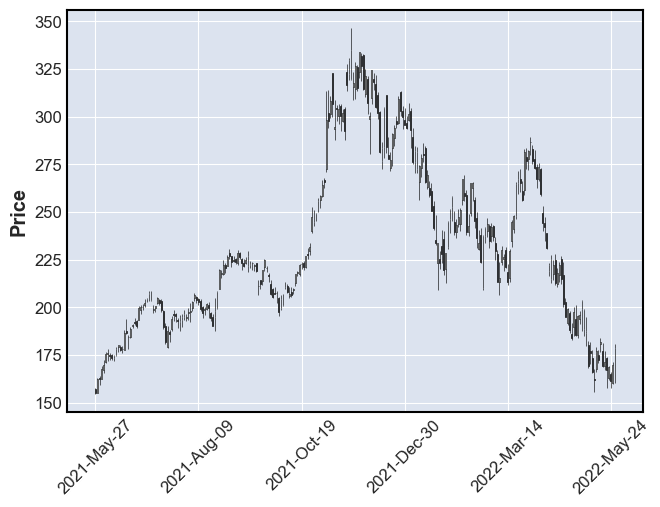

In [48]:
mpf.plot(data_day_OLHC, type='candle')

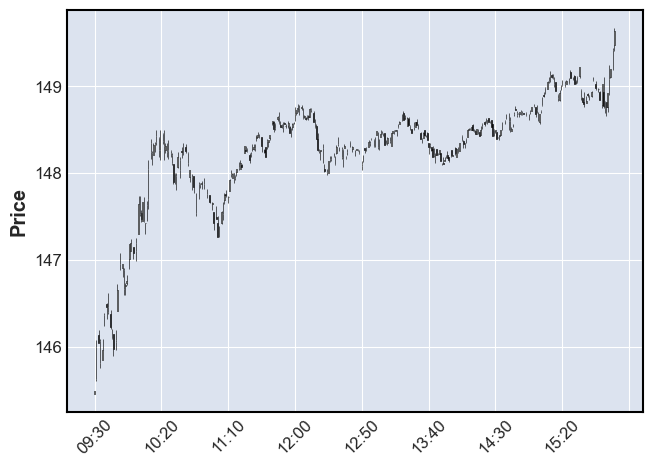

In [47]:
mpf.plot(data_intraday_OLHC, type='candle')

## Otros

### Investpy

Para descargar datos de Investing

investpy: https://investpy.readthedocs.io/

<center>
<img src="./imgs/investing.png"  alt="drawing" width="1000"/>
</center>

Ojo. Lo que está haciendo esta librería es un webscraping. Por lo que si cambia la web, la fiabilidad de los datos sería muy cuestionable.

### Pandas Data Reader

Pandas tiene una librería para descargar datos de multitud de fuentes

pandas-datareader: https://pandas-datareader.readthedocs.io

<center>
<img src="./imgs/pandas_datareader.png"  alt="drawing" width="1000"/>
</center>

Esta librería nos permite conectarnos con multitud de fuentes de datos: IEX, Alpha Vantage, Quandl...

<center>
<img src="./imgs/fuentes_pandas.png"  alt="drawing" width="1000"/>
</center>

Por ejemplo, para conectarnos a IEX desde Pandas Data Reader

<center>
<img src="./imgs/iex_pandas.png"  alt="drawing" width="1000"/>
</center>